# Classification Approch

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline

#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

### PreProcess


In [2]:
names = ['wifi 1', 'wifi 2', 'wifi 3', 'wifi 4', 'wifi 5', 'wifi 6', 'wifi 7', 'room']
df= pd.read_csv('../wifi_localization.txt',names=names,sep='\t')
df

,wifi 1,wifi 2,wifi 3,wifi 4,wifi 5,wifi 6,wifi 7,room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


#### Clean and Engeering Data

#### Split Data in Train/Test for X and y


In [3]:
X = df.drop(['room'],axis=1)
y = df['room']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=1099, stratify=y)


### Model

In [4]:
poly = PolynomialFeatures()

grad = GradientBoostingClassifier()

ada = AdaBoostClassifier()

pipe_grad = Pipeline([('poly', poly), ('grad', grad)]) 



In [5]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression

In [6]:
#hyp_param value GRAD
#poly
degree = list(range(1,7,1))
#grad
loss_grad = ['log_loss', 'exponential']
learning_rate_grad = list(np.logspace(-4,4,10))
n_estimators_grad = [50, 100, 150, 200, 300 ]
criterion_grad = ['friedman_mse', 'squared_error']
max_depth_grad = [1,2,3,4,5,6,7]
max_features_grad = [ 'sqrt', 'log2']

In [7]:
grad_hyp_param ={
    #poly
    'poly__degree': degree, 
    #grad
    'grad__criterion': criterion_grad,
    'grad__learning_rate': learning_rate_grad,
    'grad__loss': loss_grad,
    'grad__max_depth': max_depth_grad,
    'grad__max_features': max_features_grad,
    'grad__n_estimators': n_estimators_grad,
}

In [8]:
full_model_grad = GridSearchCV(
    estimator=pipe_grad,
    param_grid=grad_hyp_param,
    cv=5,
    verbose=2
)

#### Create Model(s)

#### Train Model

In [9]:
full_model_grad.fit(X_train, y_train)

Fitting 5 folds for each of 16800 candidates, totalling 84000 fits
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=sqrt, grad__n_estimators=50, poly__degree=1; total time=   0.2s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=sqrt, grad__n_estimators=50, poly__degree=1; total time=   0.2s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=sqrt, grad__n_estimators=50, poly__degree=1; total time=   0.2s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=sqrt, grad__n_estimators=50, poly__degree=1; total time=   0.2s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=sqrt, grad__n_estimators=50, poly__degree=1; to

KeyboardInterrupt: 

### Evaluate model

#### Test On data

In [ ]:
y_pred_grad = full_model_grad(X_test)

In [ ]:
ConfusionMatrixDisplay(
    confusion_matrix(y_true=y_test,y_pred=y_pred_grad),
    display_labels=full_model_grad.classes_
).plot()

In [ ]:
print(classification_report(y_true=y_test,y_pred=y_pred_grad))

### Final Model(s)


#### Train on all Data 

##### no need

#### Save with joblib

import joblib
joblib.dump(value=full_model,filename=filename)

### Model

In [10]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample

In [29]:
pipe_ada = Pipeline([ ('ada', ada)])

In [30]:
#hyp_param value ADA
#poly
degree = list(range(1,4,1))
#grad
n_estimators_ada = [25, 50, 100, 150,  300 ]
algorithm = ['SAMME', 'SAMME.R']

In [34]:
ada_hyp_param ={
    #poly
    #'poly__degree': degree, 
    #grad
    'ada__n_estimators' : n_estimators_ada,
    'ada__algorithm' : algorithm
}



In [35]:
full_model_ada = GridSearchCV(
    estimator=pipe_ada,
    param_grid=ada_hyp_param,
    cv=5,
    verbose=2
)

#### Create Model(s)

#### Train Model

In [53]:
#full_model_ada.fit(X_train, y_train)
temp = AdaBoostClassifier(n_estimators=150)
temp.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=150)

### Evaluate model

#### Test On data

In [54]:
#y_pred_ada = full_model_ada.pr(X_test)

temp_y= temp.predict(X_test)

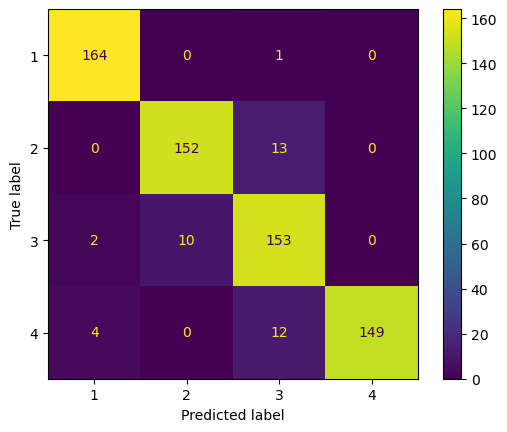

In [55]:
ConfusionMatrixDisplay(
    confusion_matrix(y_true=y_test,y_pred=temp_y),
    display_labels=temp.classes_
).plot()

In [56]:
print(classification_report(y_true=y_test,y_pred=temp_y))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       165
           2       0.94      0.92      0.93       165
           3       0.85      0.93      0.89       165
           4       1.00      0.90      0.95       165

    accuracy                           0.94       660
   macro avg       0.94      0.94      0.94       660
weighted avg       0.94      0.94      0.94       660



### Final Model(s)


In [48]:
temp.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

#### Train on all Data 

##### no need

#### Save with joblib

In [22]:
import joblib
joblib.dump(value=full_model,filename=filename)